<a href="https://colab.research.google.com/github/XiadaniCue/Simulaci-n-1/blob/main/Experimento_de_la_aguja_de_Buffon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Experimento de la aguja de Buffon**

**Analìticamente**

El experimento de la aguja de Buffon es un famoso problema geométrico y estadístico que se utiliza para estimar el valor de $\pi$ mediante métodos probabilísticos. Fue propuesto por el matemático francés Georges-Louis Leclerc, conde de Buffon, en el siglo XVIII.

**Determinar la probabilidad de que la aguja caiga sobre alguna linea paralela**

La probabilidad de que la aguja cruce una línea está dada por la fórmula:

$$ P = \frac{2 \cdot l}{\pi d} $$

donde $l$ es la longitud de la aguja y  $d$ es la distancia entre las líneas en el piso.

A partir de esta fórmula, podemos despejar $ \pi $ para obtener una estimación:

$$
\pi \approx \frac{2l}{P \cdot d}
$$

**Consideramos la variable**
$$x_i= \Biggl\{\begin{array}{c}1~si~la~aguja~cruza~una~linea~(p) \\ 0~~~si~cae~fuera~(1-p) \end{array}$$


**Experimento:**
  1. Dibujamos líneas paralelas en un piso a una distancia $d$ una de otra.
  2. Lanzamos una aguja de longitud $ l $ varias veces sobre el piso de manera aleatoria.
  3. Registramos cuántas veces la aguja cruza una de las líneas.
  4. Calculamos la probabilidad $ P $ de que la aguja cruce una línea.
  5. Estimamos $ \pi $ utilizando la fórmula inversa.




In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

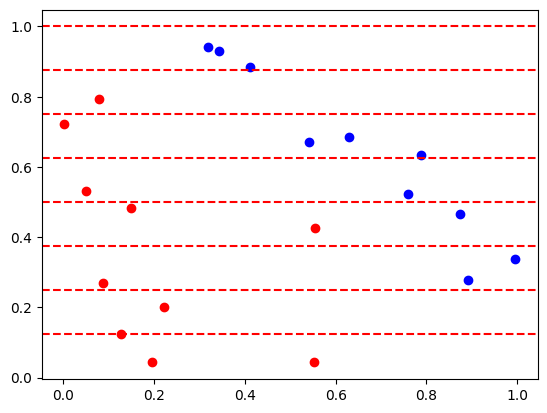

In [19]:
plt.axhline(0.125, color="red", linestyle="--")
plt.axhline(0.25, color="red", linestyle="--")
plt.axhline(0.375, color="red", linestyle="--")
plt.axhline(0.5, color="red", linestyle="--")
plt.axhline(0.625, color="red", linestyle="--")
plt.axhline(0.75, color="red", linestyle="--")
plt.axhline(0.875, color="red", linestyle="--")
plt.axhline(1, color="red", linestyle="--")
for i in range(20):
  u1=rnd.random()
  u2=rnd.random()
  if u2<=1-u1:
    plt.scatter(u1,u2, color="red")
  else:
    plt.scatter(u1, u2, color="blue")
plt.show()

In [20]:
def prob(N):
  lista=[]
  exitos=0
  for k in range(N):
    u1=rnd.random()
    u2=rnd.random()
    if u2<=1-u1:
      exitos=exitos+1
    prob=exitos/(k+1)
    lista.append(4*prob)
  return lista

In [22]:
m=prob(1000)

In [23]:
#Calculamos la media
media= np.mean(m)

In [24]:
#calulamos la Varianza
vari=np.var(m)

In [25]:
#Calculamos la desviación estándar
desv=np.std(m)

In [26]:
a=media+desv
b=media-desv

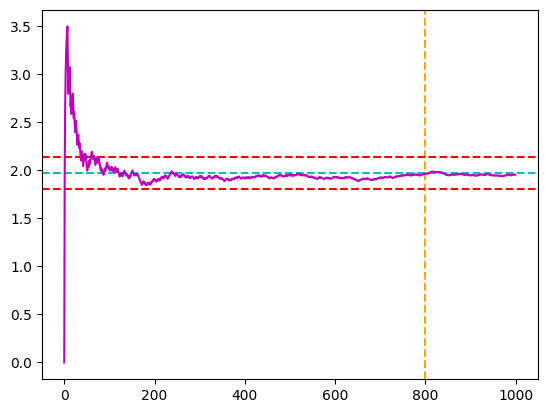

In [29]:
plt.axvline(x=800, ymin=0, ymax=2, linestyle="--", color="orange")
plt.axhline(a, color="red", linestyle="--")
plt.axhline(b, color="red", linestyle="--")
plt.axhline(media, color="c", linestyle="--")
plt.plot(m, color="m")
plt.show()

In [30]:
#Se ve una muestra considerable de tamaño N≈800 donde da un resultado aceptable

In [31]:
def simu(num_simulaciones, num_lanzamientos, l, d):
    pi_estimados = []

    for _ in range(num_simulaciones):
        cruces = 0

        # Simular el lanzamiento de la aguja num_lanzamientos veces
        for _ in range(num_lanzamientos):
            # Generar posición aleatoria de la aguja (centro de la aguja y ángulo)
            x_center = np.random.uniform(0, d/2)  # Posición x del centro de la aguja
            theta = np.random.uniform(0, np.pi/2)  # Ángulo de la aguja respecto a las líneas

            # Calcular extremo de la aguja en el eje x
            x_end = x_center - (l/2) * np.cos(theta)

            # Verificar si la aguja cruza una línea
            if x_end < 0 or x_end > d/2:
                cruces += 1

        # Calcular la estimación de pi para esta simulación
        if cruces > 0:
            pi_estimado = (2 * l * num_lanzamientos) / (cruces * d)
            pi_estimados.append(pi_estimado)

    return pi_estimados


In [37]:
def graficar_histograma(pi_estimados):
    plt.hist(pi_estimados, bins=500, edgecolor='blue')
    plt.grid(True)
    plt.show()

In [38]:
# Parámetros del experimento
num_simulaciones = 1000  # Número de simulaciones del experimento
num_lanzamientos = 800  # Número de lanzamientos de la aguja en cada simulación
l = 1.0  # Longitud de la aguja
d = 2.0  # Distancia entre líneas paralelas en el piso

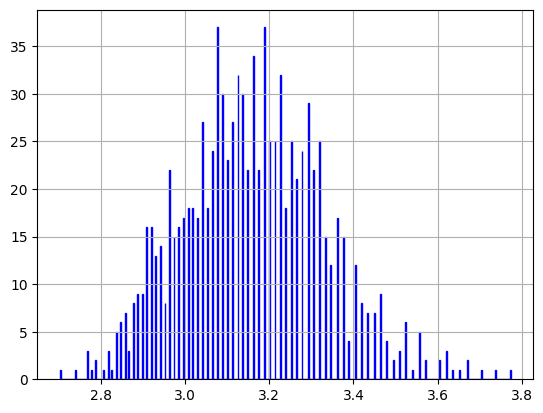

In [39]:
# Simular el experimento
pi_estimados = simu(num_simulaciones, num_lanzamientos, l, d)
# Graficar histograma de las estimaciones de pi
graficar_histograma(pi_estimados)